**Importing Files**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
def BoxPlotOfData(data, target, feature, xlabel, ylabel):
    plt.figure(figsize=(10,8))
    sns.boxplot(data= data, x = data[target], y = data[feature])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{target} and {feature}')
    plt.show()

In [ ]:
def CountPlotOfData(data, feature):
    uniques,counts = np.unique(data[feature], return_counts=True)
    plt.bar(uniques, counts)
    plt.xlabel(feature)
    plt.ylabel("Value Count")
    plt.title(f'Bar Chart of  {feature}')
    plt.show()

In [ ]:
def CompareActualAndPredictValues(actual, predicted, xlabel, ylabel):
    indexes = range(len(actual))
    plt.figure(figsize=(20,10))
    plt.plot(indexes, actual, label='Actual Values', marker='o')
    plt.plot(indexes, predicted, label='Predicted Values', marker='^')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
encoder = LabelEncoder()

In [ ]:
_data = pd.read_csv('/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv')

In [ ]:
_data = _data.dropna(subset = ['Drug'])
_data = _data.drop(labels = ['ID'], axis = 1)

In [ ]:
_data.sample(10)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
226,999,D,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,2.0
205,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.0,4.07,12.0,5300.0,57.35,68.0,240.0,11.0,1.0
230,1165,D,Placebo,21307,F,N,Y,Y,N,3.4,518.0,1.96,115.0,2250.0,203.05,90.0,190.0,10.7,4.0
144,2976,C,Placebo,18701,F,N,N,Y,N,0.7,309.0,3.84,96.0,858.0,41.85,106.0,253.0,11.4,3.0
98,3820,C,Placebo,17703,M,N,N,N,N,1.8,460.0,3.35,148.0,1472.0,108.50,118.0,172.0,10.2,2.0
207,904,D,D-penicillamine,22388,F,N,Y,N,N,3.9,396.0,3.20,58.0,1440.0,153.45,131.0,156.0,10.0,4.0
255,1701,C,D-penicillamine,11485,F,N,N,N,N,1.1,336.0,3.74,48.0,823.0,84.00,108.0,242.0,9.7,3.0
152,2863,C,D-penicillamine,18118,F,N,N,N,N,0.5,217.0,3.85,68.0,453.0,54.25,68.0,270.0,11.1,1.0
93,750,D,D-penicillamine,19693,F,N,Y,Y,N,3.2,201.0,3.11,178.0,1212.0,159.65,69.0,188.0,11.8,4.0
134,3150,C,D-penicillamine,15694,F,N,N,N,N,0.4,263.0,3.57,123.0,836.0,74.40,121.0,445.0,11.0,2.0


In [ ]:
_data['Cholesterol'] = _data['Cholesterol'].fillna(_data['Cholesterol'].median())
_data['Copper'] = _data['Copper'].fillna(_data['Copper'].median())
_data['Tryglicerides'] = _data['Tryglicerides'].fillna(_data['Tryglicerides'].median())
_data['Platelets'] = _data['Platelets'].fillna(_data['Platelets'].median())

In [ ]:
_data.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
_cdata = _data.select_dtypes(include="object")
_ndata = _data.select_dtypes(exclude="object")
print("Categorical Features: ",_cdata.columns.to_list())
print("\n")
print("Numerical Features: ", _ndata.columns.to_list())

Categorical Features:  ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


Numerical Features:  ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [ ]:
_qdata = pd.DataFrame(quantile_transformer.fit_transform(_ndata))
_qdata.columns = _ndata.columns
_qdata['Stage'] = _ndata['Stage'].astype(int)

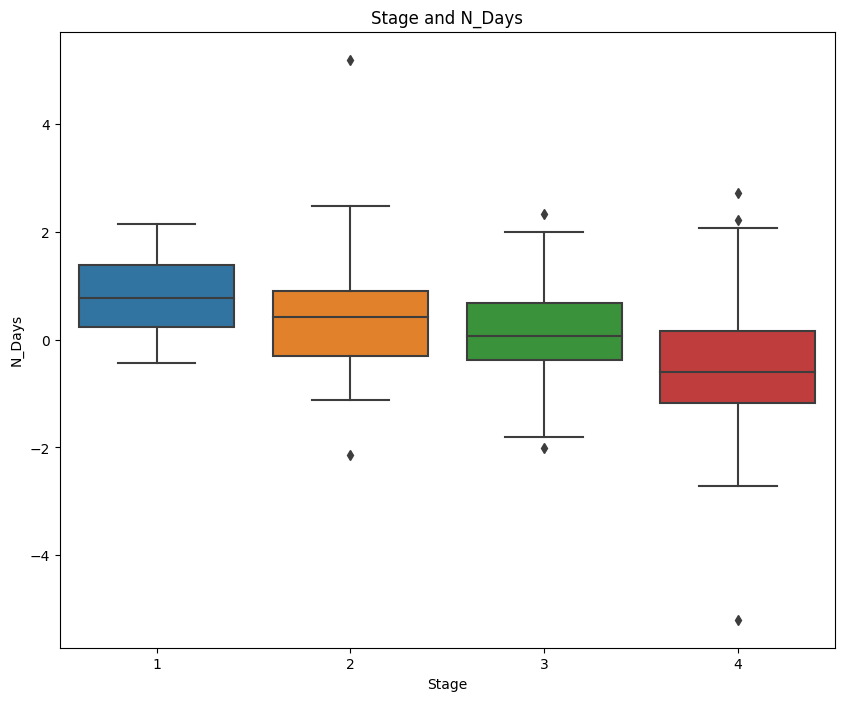

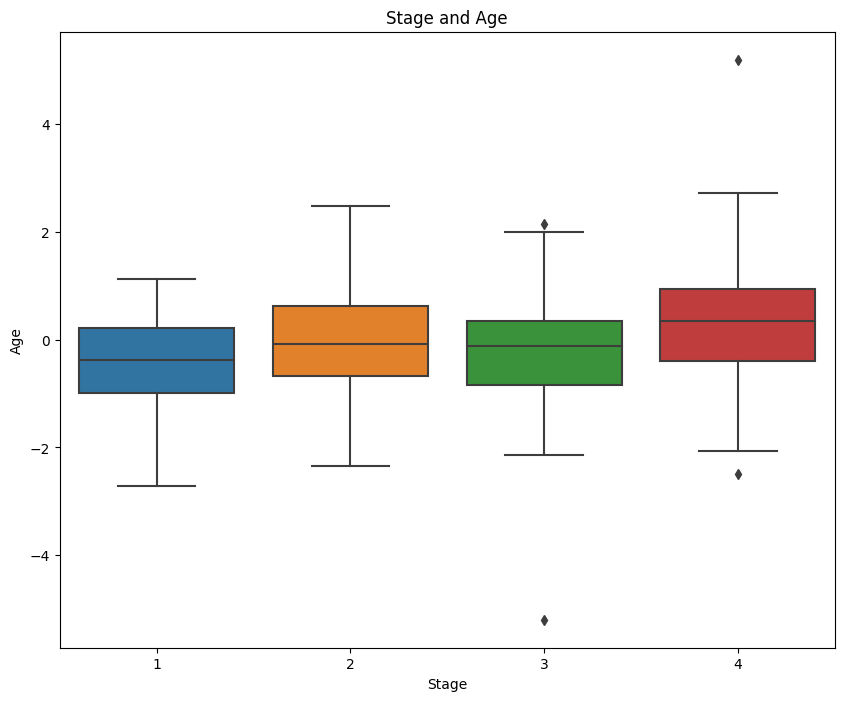

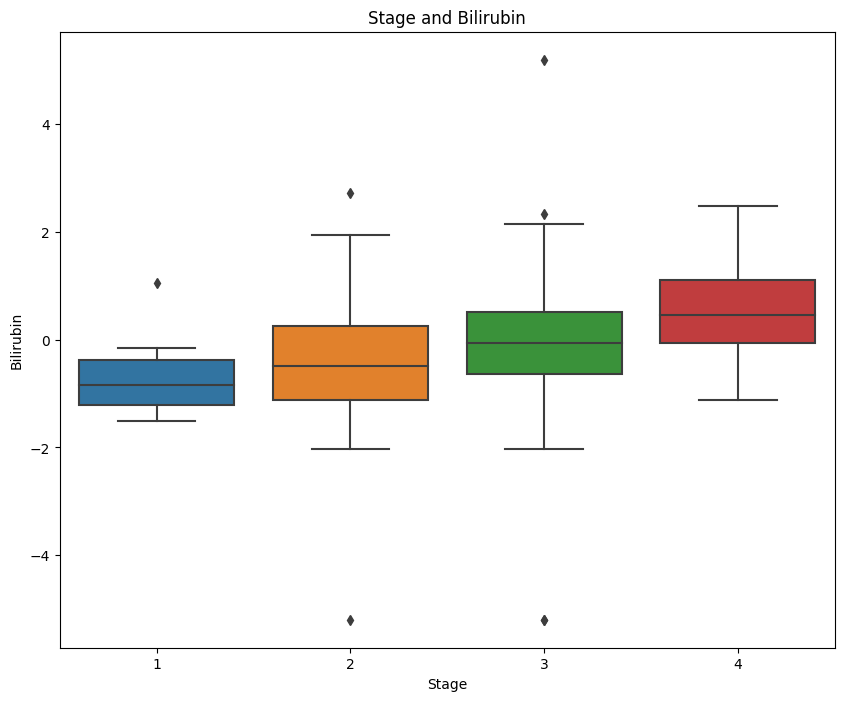

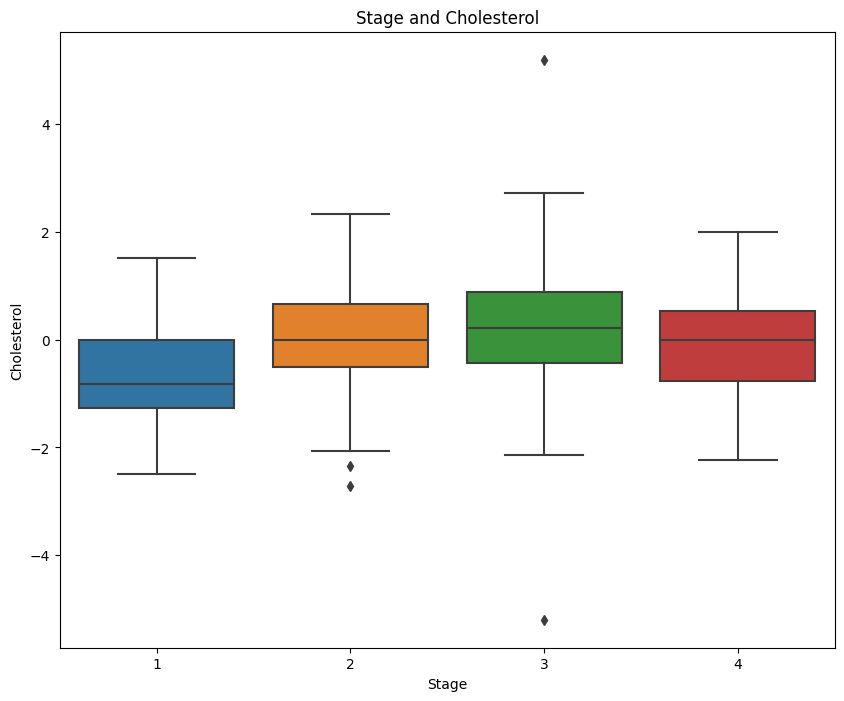

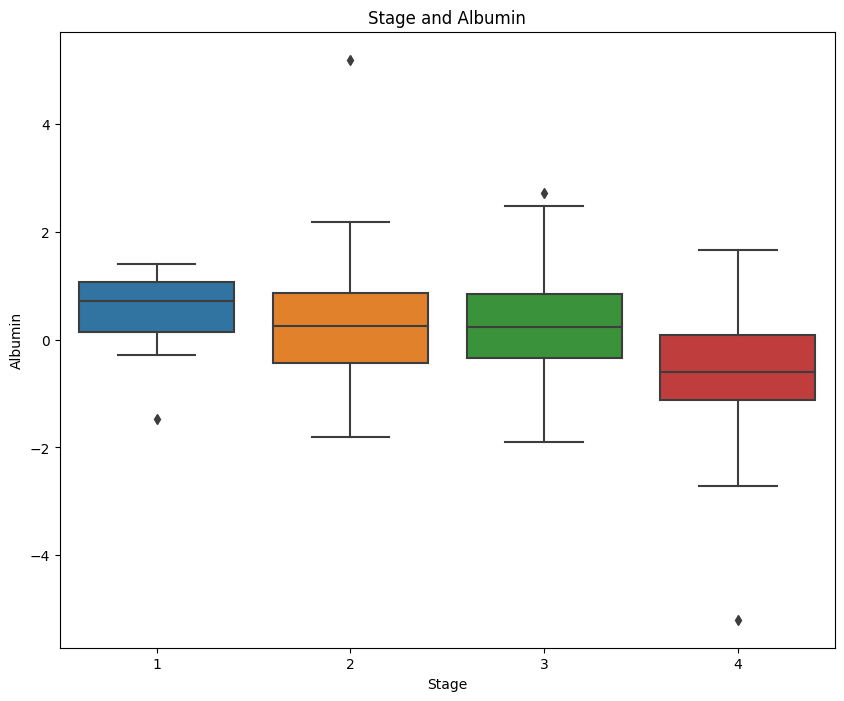

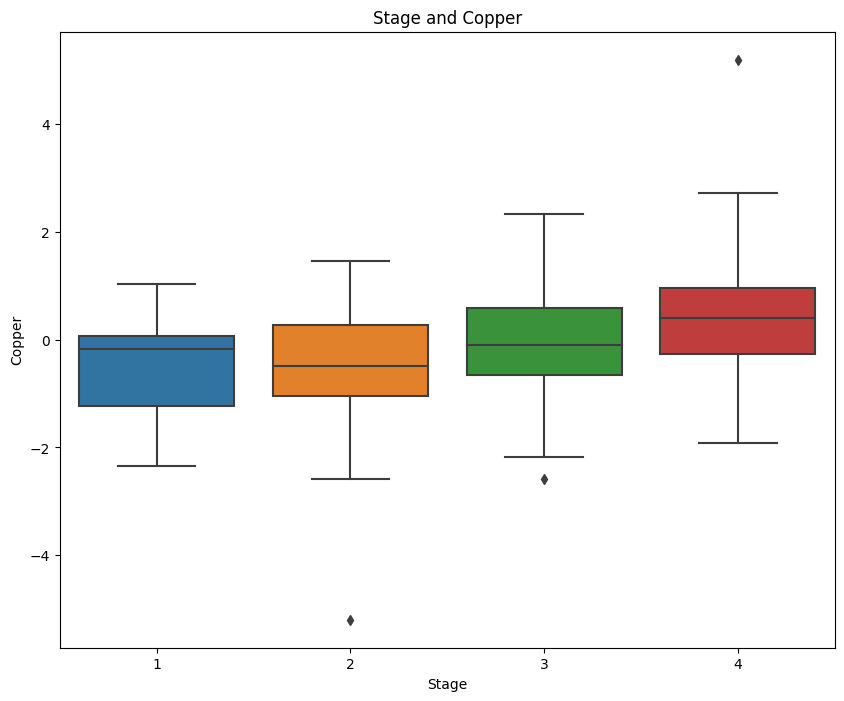

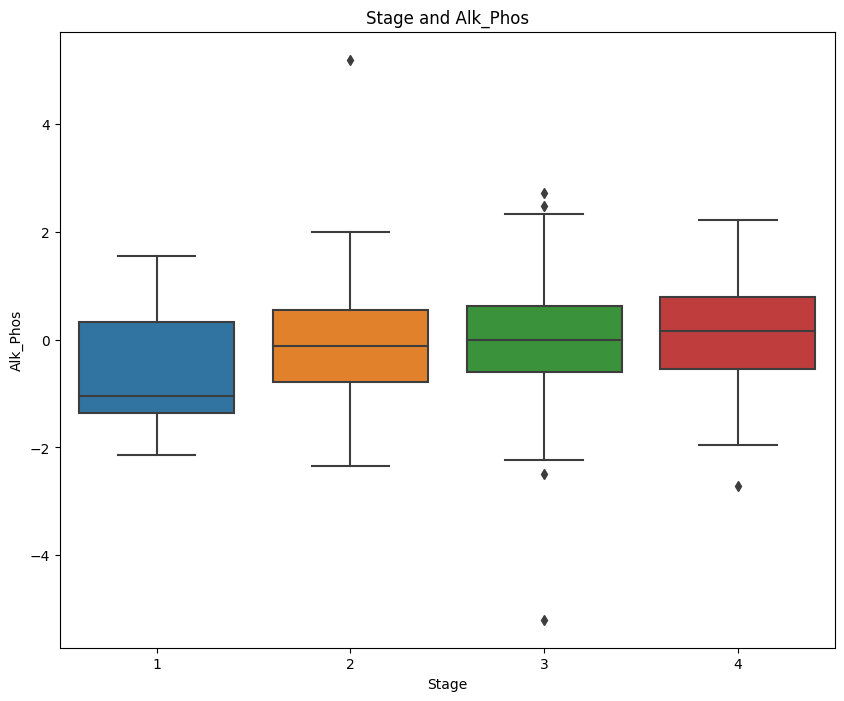

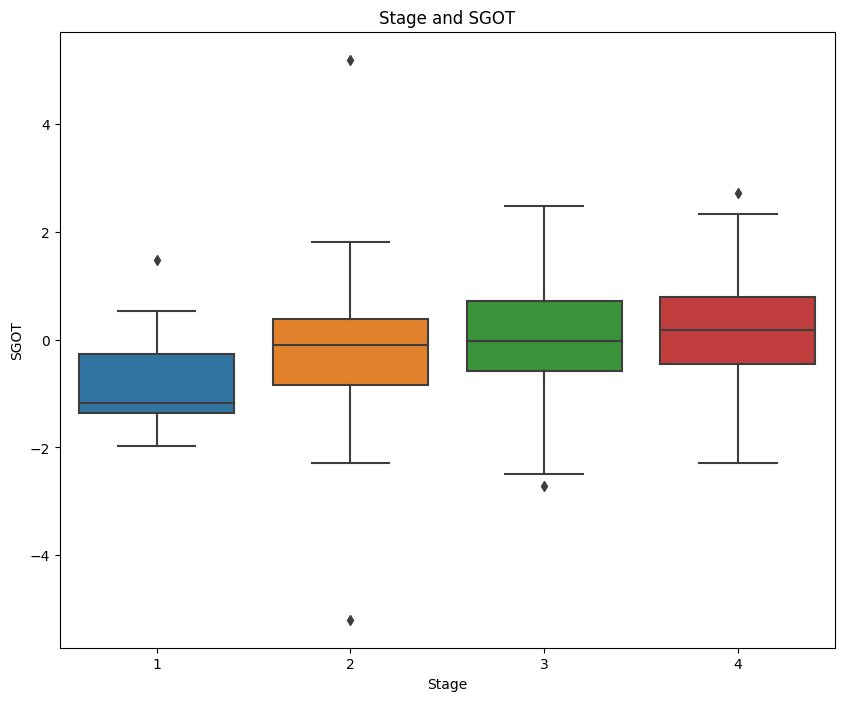

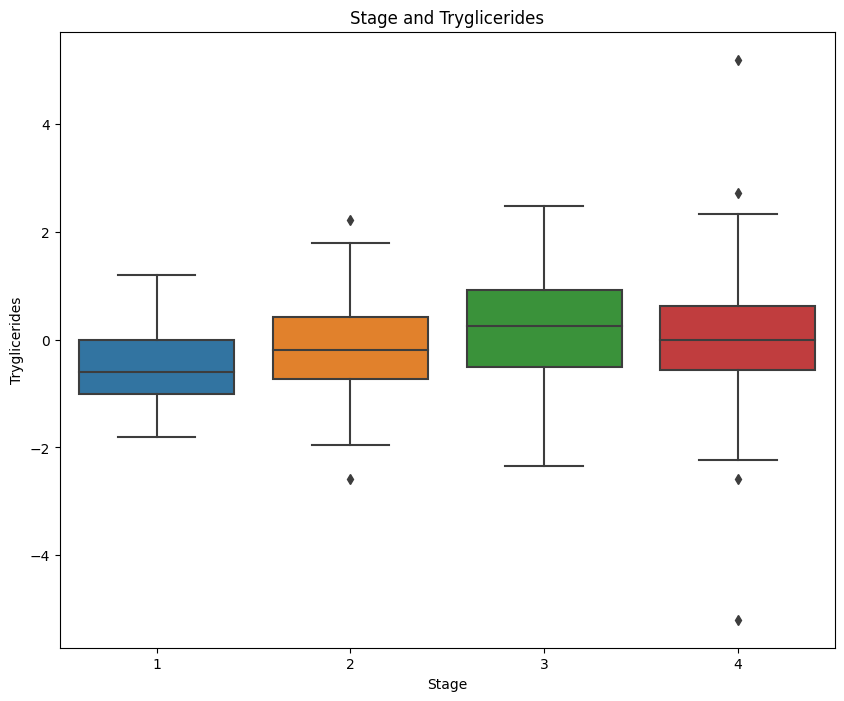

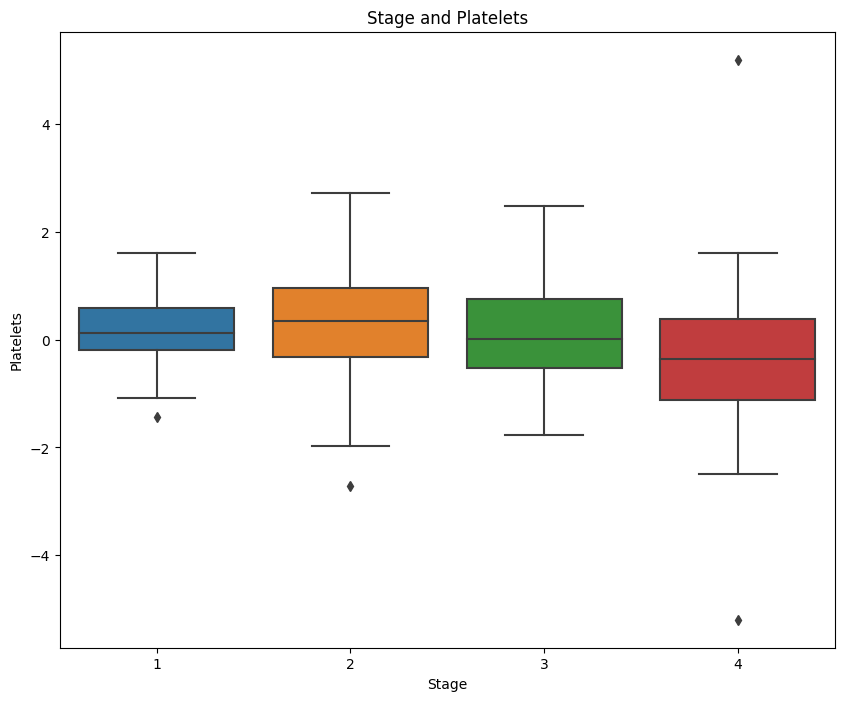

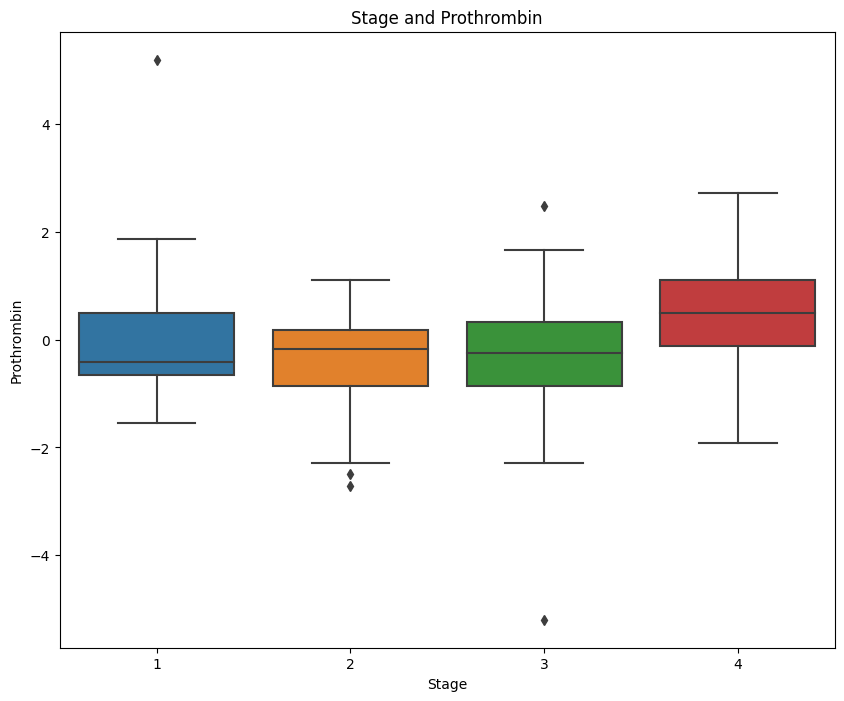

In [ ]:
features = _qdata.columns[:11].to_list()
target = 'Stage'
for feature in features:
    BoxPlotOfData(_qdata, target, feature, target, feature)


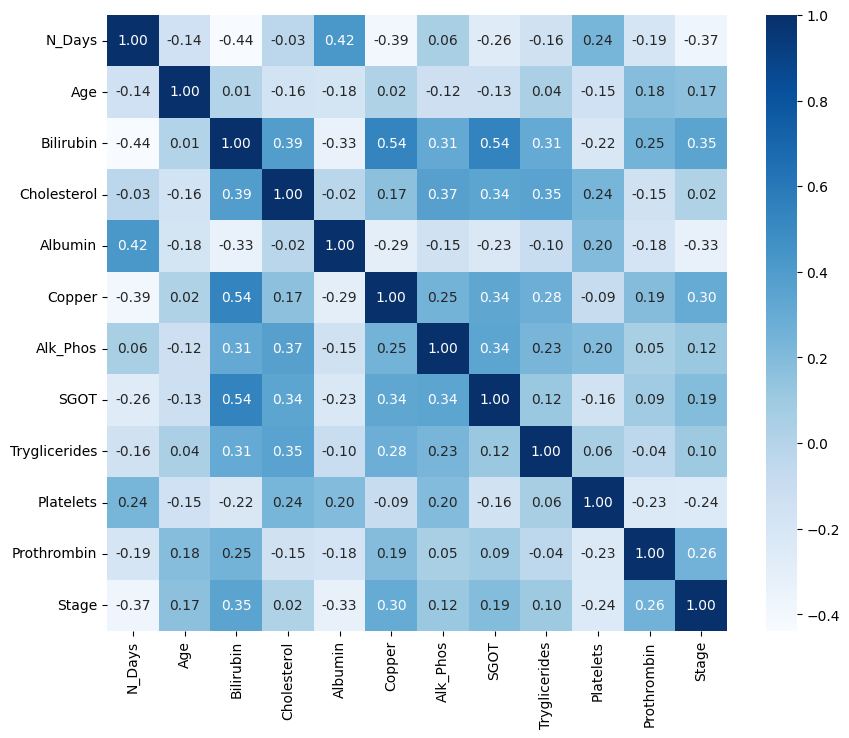

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=_qdata.corr(), cmap='Blues', fmt='0.2f', annot = True)
plt.show()

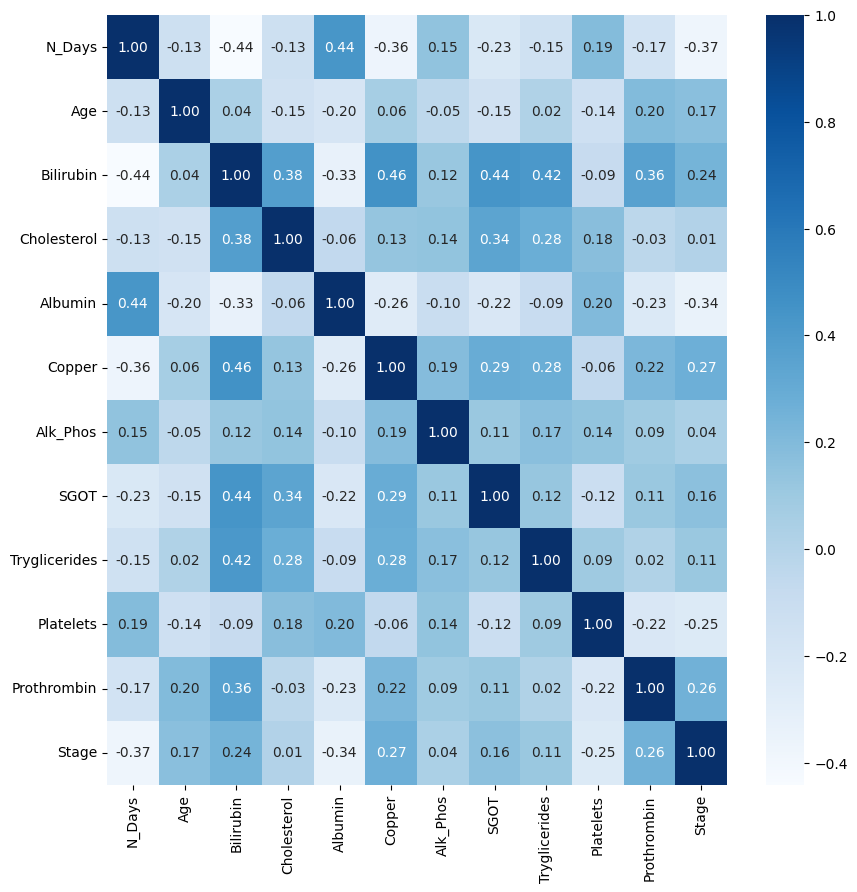

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(data=_ndata.corr(), cmap='Blues', fmt='0.2f', annot = True)
plt.show()

In [ ]:
_ldata = _cdata.copy()
features_to_encode = _ldata.columns.to_list()
for feature in features_to_encode:
    _ldata[feature] = encoder.fit_transform(_ldata[feature])

In [ ]:
_alldata = _ldata.copy()
cols = _qdata.columns.to_list()
for col in cols:
    _alldata[col] = _qdata[col]

In [ ]:
_alldata

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,0,0,1,1,1,2,-1.446953,0.809885,1.730162,-0.536461,-1.850034,0.915120,0.445514,0.481410,1.031619,-0.760517,1.435568,4
1,0,0,0,0,1,1,0,2.339828,0.641958,-0.256678,-0.174164,1.630983,-0.323944,1.767345,-0.012090,-0.637014,-0.405803,0.032245,3
2,2,0,1,0,0,0,1,-0.821124,1.896622,0.028213,-1.850034,-0.198769,1.321019,-1.947733,-0.319699,-1.807146,-1.117769,1.292623,4
3,2,0,0,0,1,1,1,0.044344,0.418966,0.149665,-0.838181,-1.975323,-0.174164,1.601236,-1.230127,-0.481410,-0.798747,-0.252515,4
4,1,1,0,0,1,1,0,-0.281750,-1.031619,0.651894,-0.366722,-0.068563,0.815492,-1.213129,-0.024182,-1.052425,-1.350521,0.328194,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0,0,0,0,1,0,0,-0.712938,0.991291,-2.035499,-0.815492,0.096870,-1.311436,-0.843921,-0.427781,0.202881,0.340980,-0.174164,2
308,0,1,0,0,0,0,0,-0.855485,0.765910,-2.035499,-0.559878,-1.695228,-0.697435,-0.117136,-1.080897,-0.821124,-0.273374,0.252515,2
309,0,0,0,0,0,0,0,-0.915120,1.102840,0.125255,0.927441,-0.541121,-0.776762,0.427781,0.952515,-0.319699,-0.223494,-0.353821,2
310,0,0,0,0,0,0,0,-1.031619,-1.059463,0.227628,-0.793215,-0.939904,-0.056449,-0.358115,0.040310,-0.637014,0.804303,-0.113079,2


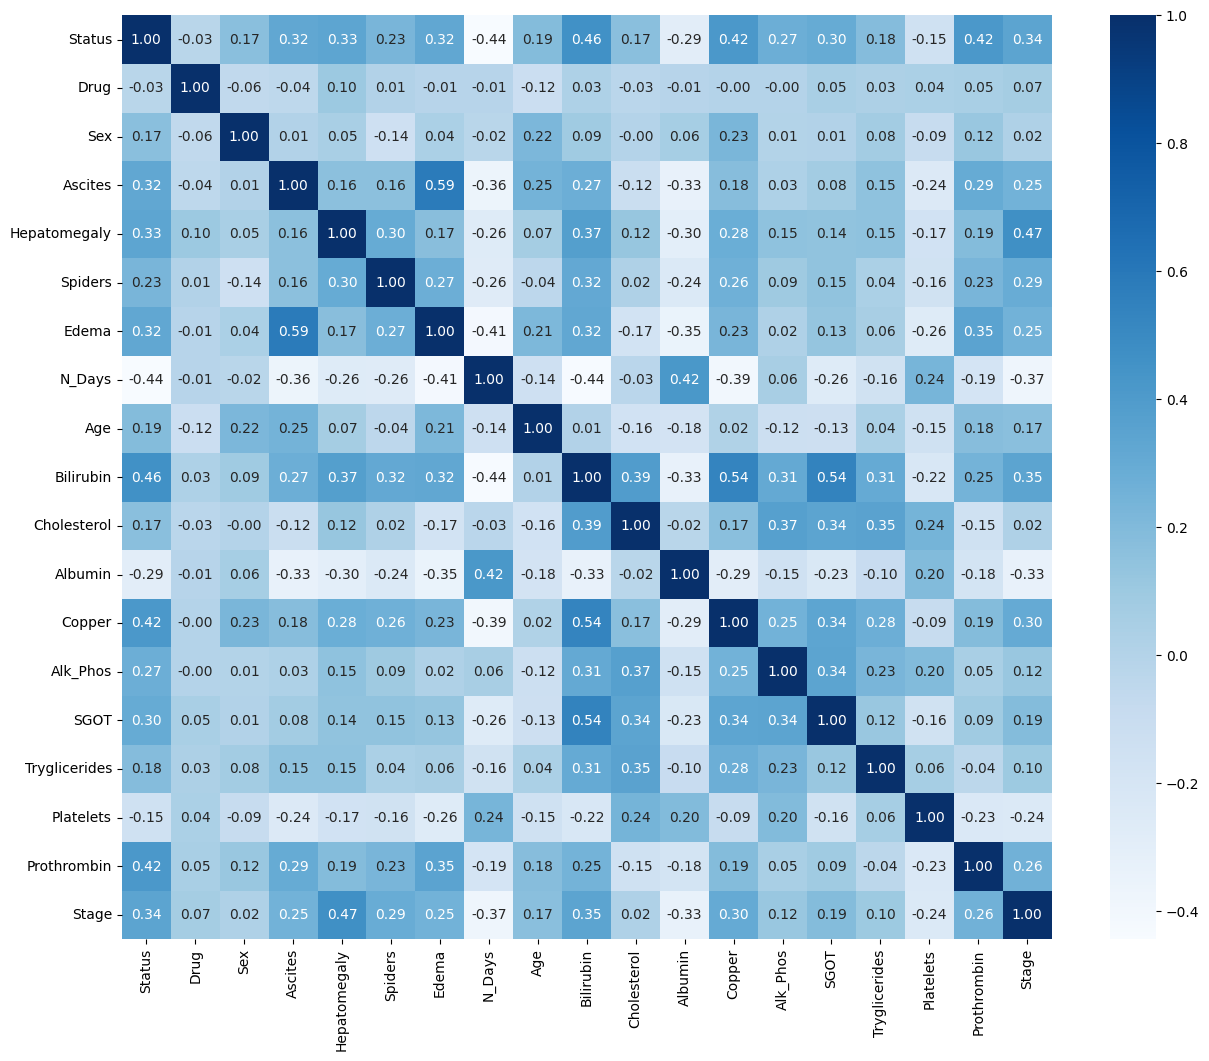

In [ ]:
plt.figure(figsize = (15, 12))
sns.heatmap(data=_alldata.corr(), cmap='Blues', fmt='0.2f', annot = True)
plt.show()

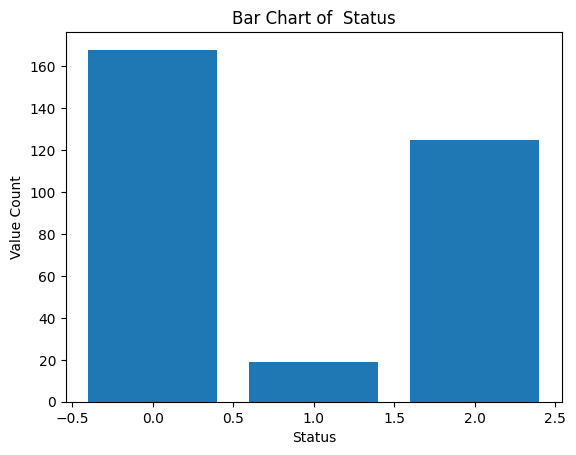

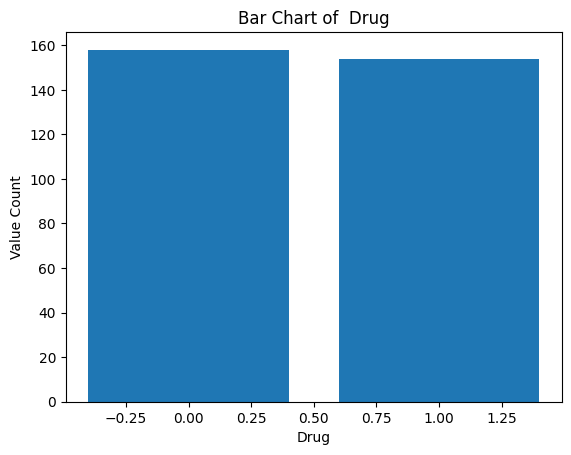

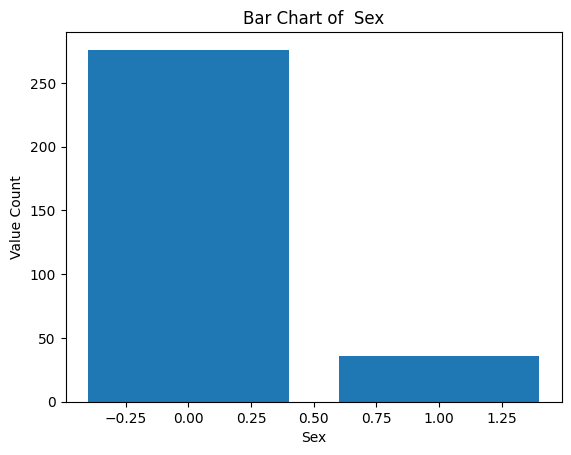

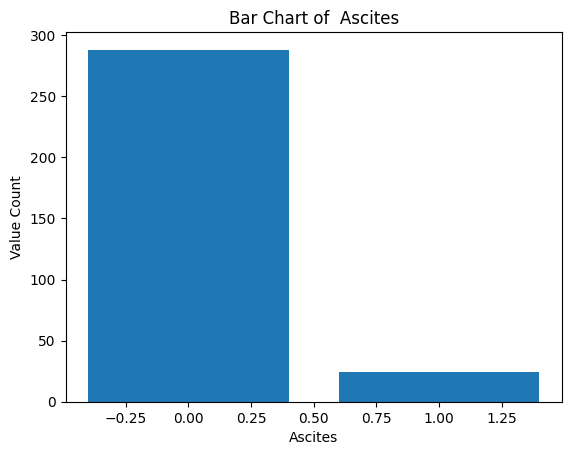

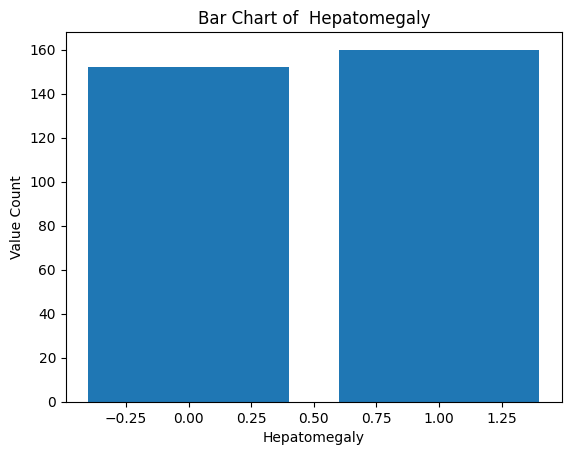

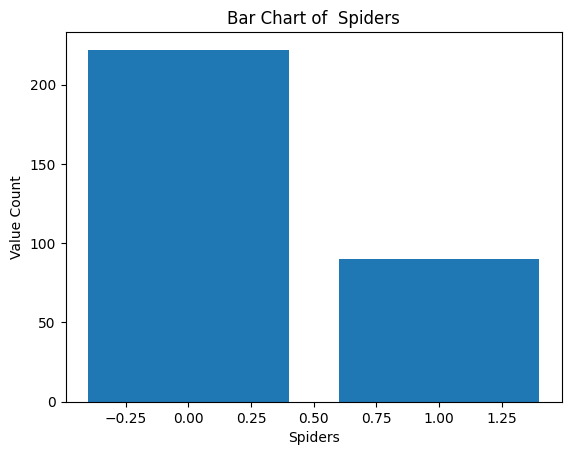

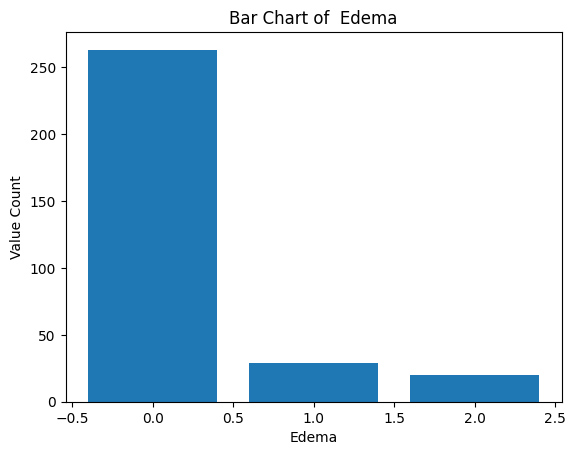

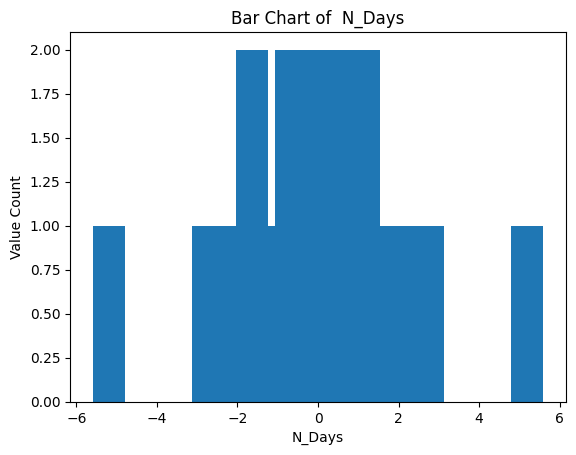

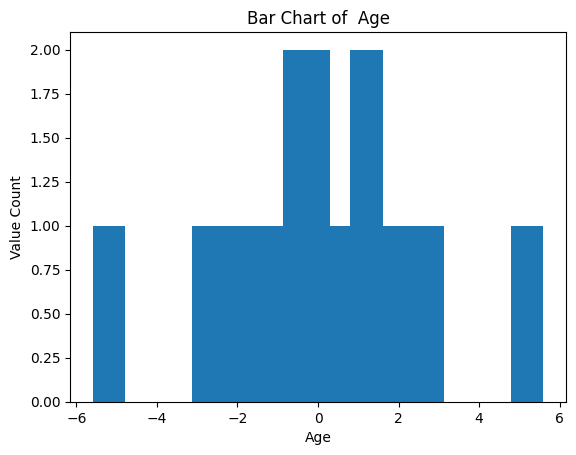

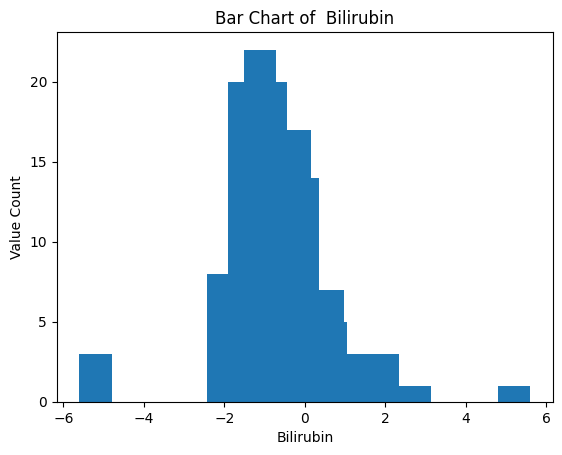

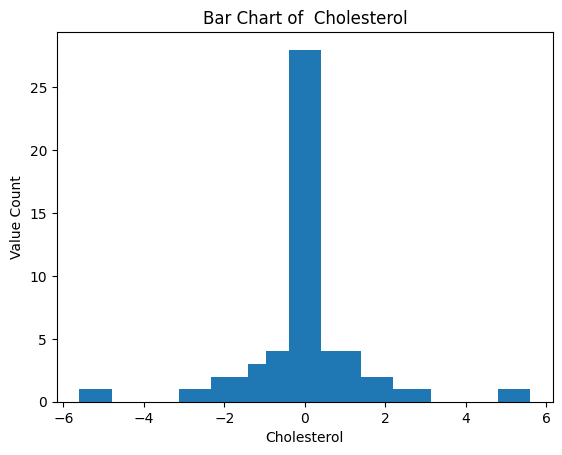

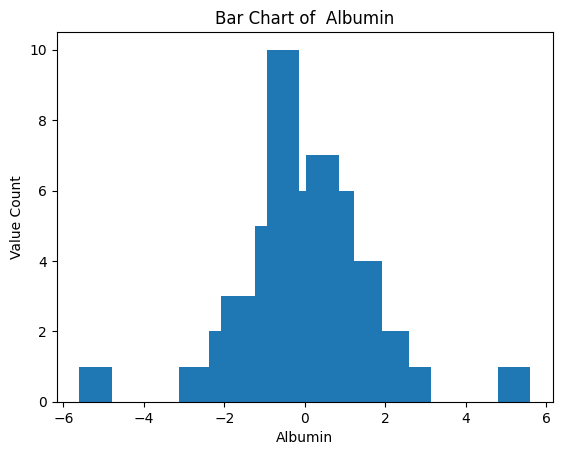

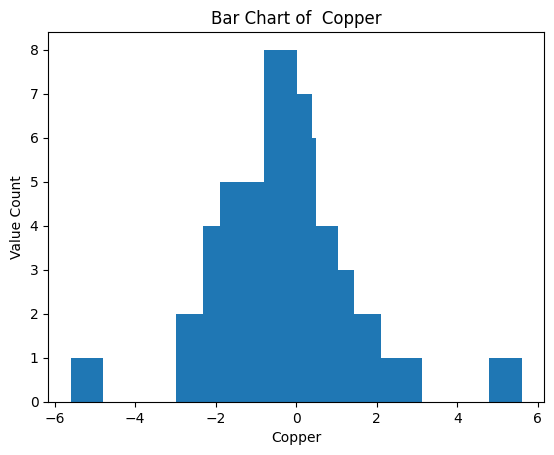

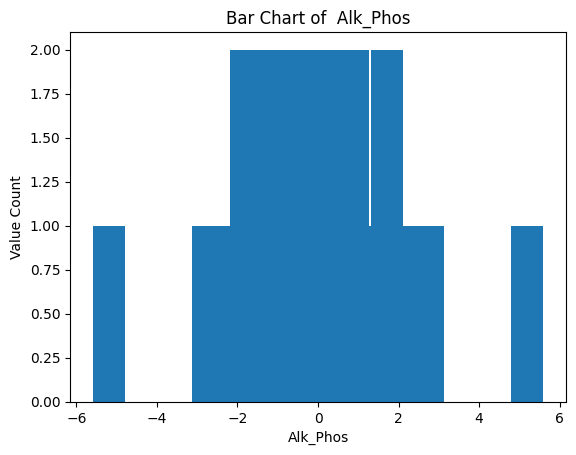

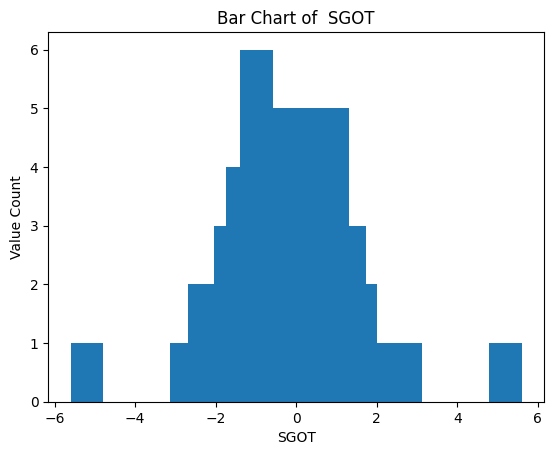

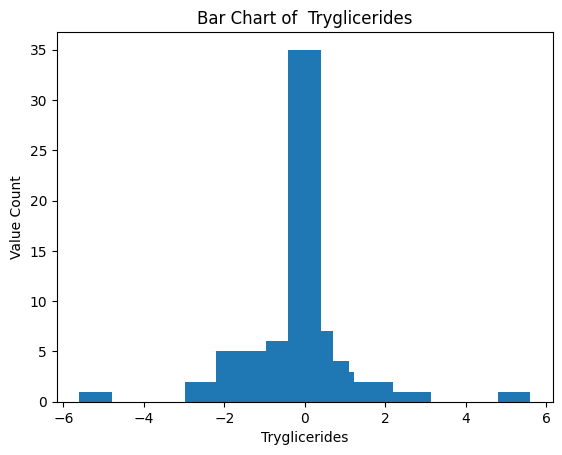

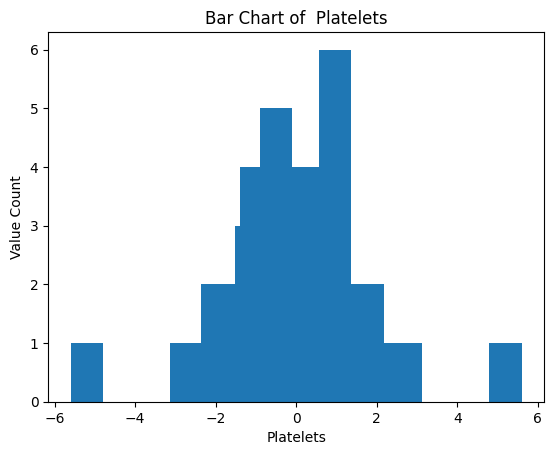

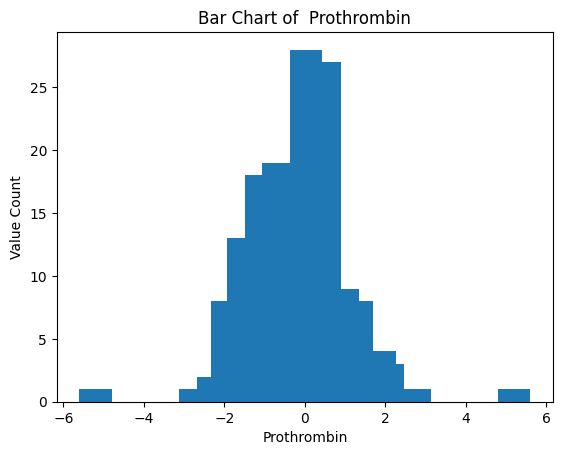

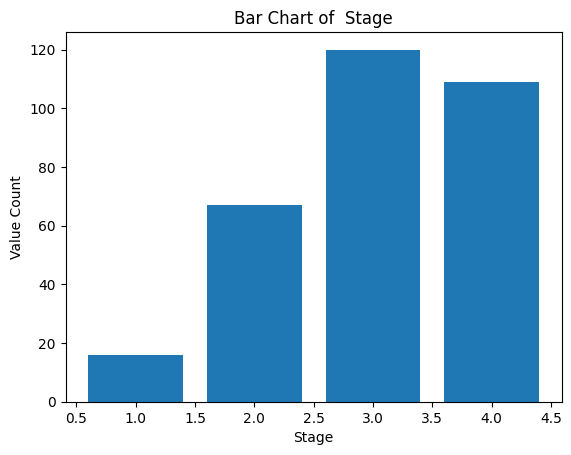

In [ ]:
features = _alldata.columns.to_list()
for feature in features:
    CountPlotOfData(_alldata, feature)

In [ ]:
features_list = _alldata.columns.to_list()
features_data, target_data = _alldata[features_list[:-1]], _alldata[features_list[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(features_data, target_data, stratify=target_data, test_size=0.2, random_state=69)

In [ ]:
def Function():
    s = 0
    score = 0
    for i in range(0, 100):
        c = MLPClassifier(hidden_layer_sizes=(36), max_iter=250, alpha=1e-4,solver='adam', random_state=i,learning_rate_init=.001)
        c.fit(X_train, Y_train)
        y_pred = c.predict(X_test)
        if f1_score(Y_test, y_pred, average = 'weighted') > score:
            score = f1_score(Y_test, y_pred, average = 'weighted')
            s = i
            print(f1_score(Y_test, y_pred, average = 'weighted'))

    return s

In [ ]:
print(Function())

0.50485401123699
0.5371914137871584
0.544195455960162
0.594120068057518
0.6165268440017456
0.6491818454082604
0.6581108240022969
92


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(36), max_iter=250, alpha=1e-4,solver='adam', random_state=92,learning_rate_init=.001)

In [ ]:
clf.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=36, max_iter=250, random_state=92)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(Y_test, y_pred)*100)
print("F1 Score: ", f1_score(Y_test, y_pred, average = 'weighted')*100)

Accuracy:  66.66666666666666
F1 Score:  65.8110824002297


In [ ]:
y_pred1 = clf.predict(X_train)

In [ ]:
print("Accuracy: ", accuracy_score(Y_train, y_pred1)*100)
print("F1 Score: ", f1_score(Y_train, y_pred1, average = 'weighted')*100)

Accuracy:  71.08433734939759
F1 Score:  70.00876841729215


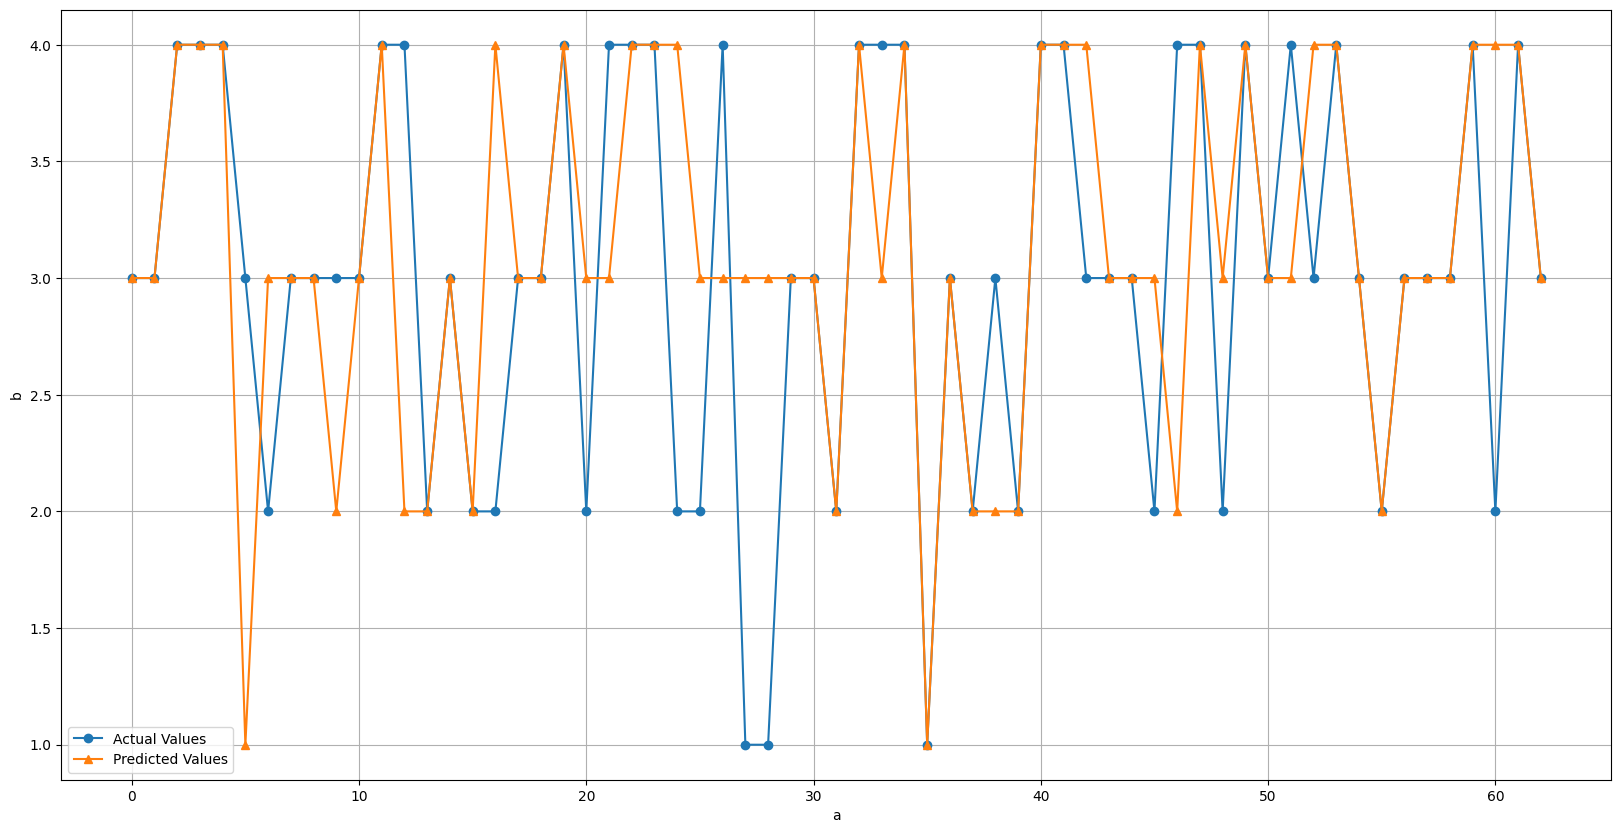

In [ ]:
CompareActualAndPredictValues(Y_test, y_pred, 'a', 'b')

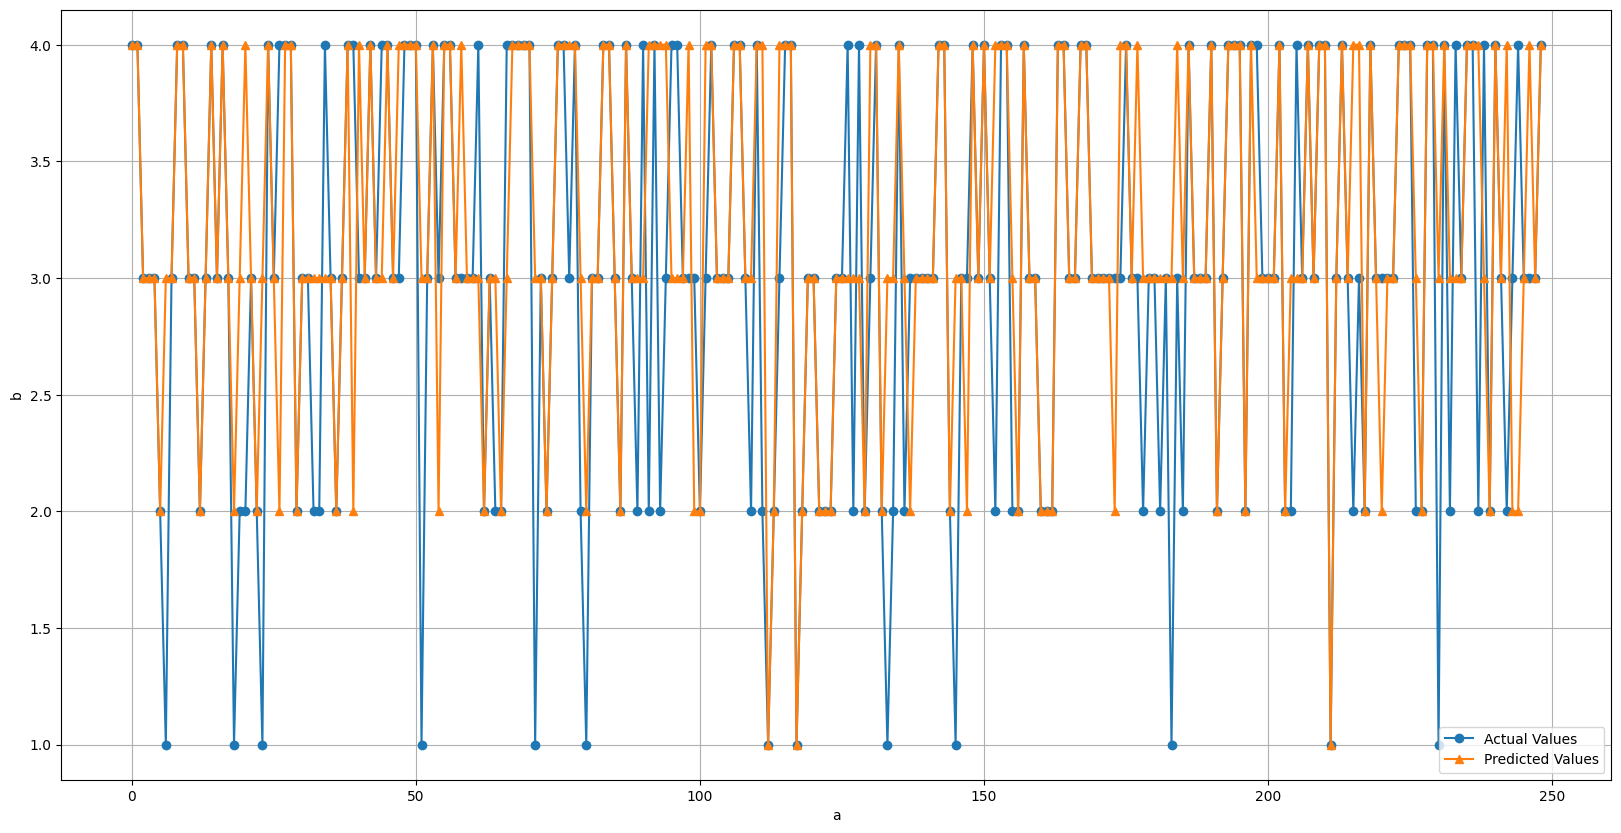

In [ ]:
CompareActualAndPredictValues(Y_train, y_pred1, 'a', 'b')

In [ ]:
Y_test.unique()

array([3, 4, 2, 1])